In [ ]:
# import requirement libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Changing Directory to google drive
%cd /content/drive

/content/drive


In [ ]:
#reading csv file
rawdf=pd.read_csv('/content/drive/MyDrive/02_Student_Mental_Health_2021-10-10.csv')

In [ ]:
#Display of Dataframe
rawdf

,StartDate,EndDate,Duration (in seconds),Eligibility,Age,Ethnicity,Ethnicity_text,Sex,Gender,Year_credits,...,Post_PSS_1,Post_PSS_2,Post_PSS_3,Post_PSS_4,Post_PSS_5,Post_PSS_6,Post_PSS_7,Post_PSS_8,Post_PSS_9,Post_PSS_10
0,2020-09-22 13:57,2020-09-22 14:05,461.0,1.0,18.0,2.0,NaN,2.0,2.0,1.0,...,4.0,3.0,3.0,1.0,3.0,3.0,2.0,3.0,3.0,3.0
1,2020-09-22 14:16,2020-09-22 14:36,1215.0,1.0,18.0,1.0,NaN,2.0,2.0,1.0,...,5.0,4.0,3.0,4.0,2.0,2.0,3.0,4.0,3.0,2.0
2,2020-09-22 14:59,2020-09-22 15:07,526.0,1.0,18.0,2.0,NaN,2.0,2.0,1.0,...,2.0,3.0,4.0,3.0,4.0,4.0,2.0,3.0,4.0,4.0
3,2020-09-22 16:07,2020-09-22 16:15,516.0,1.0,19.0,1.0,NaN,2.0,2.0,1.0,...,4.0,4.0,5.0,4.0,2.0,4.0,3.0,3.0,4.0,3.0
4,2020-09-22 17:15,2020-09-22 18:01,2751.0,1.0,18.0,1.0,NaN,2.0,2.0,1.0,...,2.0,1.0,5.0,4.0,3.0,3.0,4.0,3.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Pre-processing


In [ ]:
rawdf.shape

(1659, 147)

In [ ]:
rawdf.dropna(how ='all',inplace=True)

In [ ]:
rawdf.shape

(1192, 147)

In [ ]:
#Dropping Irrelevant columns

rawdf.drop(columns=['StartDate','EndDate','Duration (in seconds)','Eligibility','Gender','Year_calendar','Part_time','Degree','Province','Ethnicity_text','Catch_question','Diagnosis_text'],inplace=True)


In [ ]:
#Reverse Scoring scales as per instructions
rawdf['CATS_2'] = 8-rawdf['CATS_2'].astype('int')
rawdf['CATS_4'] = 8-rawdf['CATS_4'].astype('int')
rawdf['CATS_6'] = 8-rawdf['CATS_6'].astype('int')
rawdf['CATS_7'] = 8-rawdf['CATS_7'].astype('int')
rawdf['CATS_10'] = 8-rawdf['CATS_10'].astype('int')


In [ ]:
# Calculate the average of CATS_1 to CATS_10 as per Scale Instructions
rawdf['CATS'] = round(rawdf[['CATS_1', 'CATS_2', 'CATS_3', 'CATS_4', 'CATS_5', 'CATS_6', 'CATS_7', 'CATS_8', 'CATS_9', 'CATS_10']].mean(axis=1))

# Delete CATS_1 to CATS_10 columns
rawdf.drop(columns=['CATS_1', 'CATS_2', 'CATS_3', 'CATS_4', 'CATS_5', 'CATS_6', 'CATS_7', 'CATS_8', 'CATS_9', 'CATS_10'], inplace=True)


In [ ]:
# Calculate the sum of SSS_1 to SSS_12 as per scale instructions
rawdf['SSS'] = round(rawdf[['SSS_1', 'SSS_2', 'SSS_3', 'SSS_4', 'SSS_5', 'SSS_6', 'SSS_7', 'SSS_8', 'SSS_9', 'SSS_10', 'SSS_11', 'SSS_12']].sum(axis=1))

# Delete SSS_1 to SSS_12 columns
rawdf.drop(columns=['SSS_1', 'SSS_2', 'SSS_3', 'SSS_4', 'SSS_5', 'SSS_6', 'SSS_7', 'SSS_8', 'SSS_9', 'SSS_10', 'SSS_11', 'SSS_12'], inplace=True)


In [ ]:
#Reverse Scoring
rawdf['CAMS_2'] = 5-rawdf['CAMS_2'].astype('int')
rawdf['CAMS_6'] = 5-rawdf['CAMS_6'].astype('int')
rawdf['CAMS_7'] = 5-rawdf['CAMS_7'].astype('int')

In [ ]:
# Calculate the sum of CAMS_1 to CAMS_12
rawdf['CAMS'] = round(rawdf[['CAMS_1', 'CAMS_2', 'CAMS_3', 'CAMS_4', 'CAMS_5', 'CAMS_6', 'CAMS_7', 'CAMS_8', 'CAMS_9', 'CAMS_10', 'CAMS_11', 'CAMS_12']].sum(axis=1))

# Delete CAMS_1 to CAMS_12 columns
rawdf.drop(columns=['CAMS_1', 'CAMS_2', 'CAMS_3', 'CAMS_4', 'CAMS_5', 'CAMS_6', 'CAMS_7', 'CAMS_8', 'CAMS_9', 'CAMS_10', 'CAMS_11', 'CAMS_12'], inplace=True)


In [ ]:
# Calculate the sum of DERS_1 to DERS_16 as per scale instructions
rawdf['DERS'] = round(rawdf[['DERS_1', 'DERS_2', 'DERS_3', 'DERS_4', 'DERS_5', 'DERS_6', 'DERS_7', 'DERS_8', 'DERS_9', 'DERS_10', 'DERS_11', 'DERS_12', 'DERS_13', 'DERS_14', 'DERS_15', 'DERS_16']].sum(axis=1))

# Delete DERS_1 to DERS_16 columns
rawdf.drop(columns=['DERS_1', 'DERS_2', 'DERS_3', 'DERS_4', 'DERS_5', 'DERS_6', 'DERS_7', 'DERS_8', 'DERS_9', 'DERS_10', 'DERS_11', 'DERS_12', 'DERS_13', 'DERS_14', 'DERS_15', 'DERS_16'], inplace=True)


In [ ]:
# Calculate the sum of DASS_1 to DASS_21 as per scale instructions
rawdf['DASS'] = round(rawdf[['DASS_1', 'DASS_2', 'DASS_3', 'DASS_4', 'DASS_5', 'DASS_6', 'DASS_7', 'DASS_8', 'DASS_9', 'DASS_10', 'DASS_11', 'DASS_12', 'DASS_13', 'DASS_14', 'DASS_15', 'DASS_16', 'DASS_17', 'DASS_18', 'DASS_19', 'DASS_20', 'DASS_21']].sum(axis=1))

# Delete DASS_1 to DASS_21 columns
rawdf.drop(columns=['DASS_1', 'DASS_2', 'DASS_3', 'DASS_4', 'DASS_5', 'DASS_6', 'DASS_7', 'DASS_8', 'DASS_9', 'DASS_10', 'DASS_11', 'DASS_12', 'DASS_13', 'DASS_14', 'DASS_15', 'DASS_16', 'DASS_17', 'DASS_18', 'DASS_19', 'DASS_20', 'DASS_21'], inplace=True)


In [ ]:
# Create a new DataFrame called coviddf as a copy of rawdf
coviddf = rawdf.copy()

# Specify the columns to be dropped
columns_to_move = ['Pre_GAD_1', 'Pre_GAD_2', 'Pre_PHQ_1', 'Pre_PHQ_2', 'Pre_PSS_1', 'Pre_PSS_2', 'Pre_PSS_3', 'Pre_PSS_4', 'Pre_PSS_5', 'Pre_PSS_6', 'Pre_PSS_7', 'Pre_PSS_8', 'Pre_PSS_9', 'Pre_PSS_10', 'Post_GAD_1', 'Post_GAD_2', 'Post_PHQ_1', 'Post_PHQ_2', 'Post_PSS_1', 'Post_PSS_2', 'Post_PSS_3', 'Post_PSS_4', 'Post_PSS_5', 'Post_PSS_6', 'Post_PSS_7', 'Post_PSS_8', 'Post_PSS_9', 'Post_PSS_10']

# Extract the selected columns into coviddf and drop them from rawdf using .loc
coviddf = rawdf.loc[:, columns_to_move].copy()
rawdf.drop(columns=columns_to_move, inplace=True)


In [ ]:
#Display columns with null counts
null_counts = rawdf.isnull().sum()

# Filter and print only columns with null values
columns_with_nulls = null_counts[null_counts > 0]
print("Columns with null values:")
print(columns_with_nulls)

Columns with null values:
Series([], dtype: int64)


In [ ]:
#Dropping rows where Diagnosis is 3 (students who choose prefer not to say)
rawdf = rawdf.drop(rawdf.loc[rawdf['Diagnosis'] == 3].index)
rawdf.shape

(1133, 41)

In [ ]:
rawdf

,Age,Ethnicity,Sex,Year_credits,Program,Disability,Living,International,Employment,Volunteering,...,Hours_sleep,Rested,More_sleep,Mindfulness_freq,Diagnosis,CATS,SSS,CAMS,DERS,DASS
0,18.0,2.0,2.0,1.0,7.0,2.0,2.0,2.0,3.0,5.0,...,4.0,2.0,1.0,1.0,2.0,5.0,37.0,18.0,63.0,50.0
1,18.0,1.0,2.0,1.0,8.0,2.0,1.0,2.0,3.0,5.0,...,5.0,2.0,2.0,3.0,1.0,5.0,45.0,24.0,40.0,49.0
2,18.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,3.0,2.0,1.0,1.0,1.0,5.0,32.0,24.0,72.0,68.0
3,19.0,1.0,2.0,1.0,3.0,2.0,4.0,2.0,3.0,5.0,...,5.0,2.0,1.0,2.0,1.0,5.0,41.0,28.0,61.0,36.0
4,18.0,1.0,2.0,1.0,3.0,1.0,4.0,2.0,3.0,5.0,...,3.0,3.0,1.0,1.0,1.0,4.0,32.0,35.0,43.0,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186,24.0,1.0,2.0,5.0,7.0,2.0,2.0,2.0,3.0,5.0,...,5.0,2.0,2.0,2.0,2.0,5.0,44.0,40.0,17.0,23.0
1188,24.0,1.0,2.0,5.0,7.0,2.0,2.0,2.0,2.0,5.0,...,5.0,2.0,1.0,2.0,1.0,6.0,47.0,20.0,43.0,57.0
1189,29.0,1.0,2.0,5.0,7.0,1.0,2.0,2.0,3.0,1.0,...,5.0,3.0,1.0,2.0,1.0,5.0,28.0,19.0,67.0,53.0
1190,25.0,1.0,1.0,5.0,2.0,1.0,4.0,2.0,2.0,1.0,...,5.0,1.0,2.0,1.0,2.0,4.0,45.0,41.0,16.0,29.0


### Feature Selection

In [ ]:
selected_columns = []
# Iterate over the first 31 column names and add them to the list
for col in rawdf.columns[:35]:
    selected_columns.append(col)

# Print the list of selected columns
print(selected_columns)


['Age', 'Ethnicity', 'Sex', 'Year_credits', 'Program', 'Disability', 'Living', 'International', 'Employment', 'Volunteering', 'Plans', 'Hobbies_Imp_1', 'Hobbies_Imp_2', 'Hobbies_Imp_3', 'Hobbies_Imp_4', 'Hobbies_Imp_5', 'Hobbies_Imp_6', 'Hobbies_Imp_7', 'Hobbies_Imp_8', 'Hobbies_Time_1', 'Hobbies_Time_2', 'Hobbies_Time_3', 'Hobbies_Time_4', 'Hobbies_Time_5', 'Hobbies_Time_6', 'Hobbies_Time_7', 'Hobbies_Time_8', 'Strenous exercise', 'Moderate exercise', 'Mild exercise', 'Anaerobic_Aerobic', 'Hours_sleep', 'Rested', 'More_sleep', 'Mindfulness_freq']


In [ ]:
X=rawdf[selected_columns]
y=rawdf.Diagnosis

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2



# Create the SelectKBest object with the chi-squared scoring function
chi2_selector = SelectKBest(chi2, k=12)

# Fit the selector to your data and transform the features
X_kbest = chi2_selector.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices = chi2_selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_feature_indices]

# Print or use the selected features
print("Top 12 selected features:", selected_features)


Top 12 selected features: Index(['Age', 'Ethnicity', 'Year_credits', 'Program', 'Disability', 'Living',
       'Hobbies_Imp_1', 'Hobbies_Time_1', 'Moderate exercise', 'Mild exercise',
       'Rested', 'Mindfulness_freq'],
      dtype='object')


In [ ]:
#dataframe with features from feature selection and mandatory features like CATS, CAMS,SSS,DERS,DASS
df=rawdf[['Age', 'Ethnicity', 'Year_credits', 'Program', 'Disability', 'Living',
       'Hobbies_Imp_1', 'Hobbies_Time_1', 'Moderate exercise', 'Mild exercise',
       'Rested', 'Mindfulness_freq','Diagnosis','CATS','CAMS','SSS','DERS','DASS']]

In [ ]:
df


,Age,Ethnicity,Year_credits,Program,Disability,Living,Hobbies_Imp_1,Hobbies_Time_1,Moderate exercise,Mild exercise,Rested,Mindfulness_freq,Diagnosis,CATS,CAMS,SSS,DERS,DASS
0,18.0,2.0,1.0,7.0,2.0,2.0,2.0,1.0,4.0,3.0,2.0,1.0,2.0,5.0,18.0,37.0,63.0,50.0
1,18.0,1.0,1.0,8.0,2.0,1.0,1.0,1.0,3.0,10.0,2.0,3.0,1.0,5.0,24.0,45.0,40.0,49.0
2,18.0,2.0,1.0,2.0,2.0,2.0,3.0,2.0,5.0,1.0,2.0,1.0,1.0,5.0,24.0,32.0,72.0,68.0
3,19.0,1.0,1.0,3.0,2.0,4.0,3.0,1.0,2.0,2.0,2.0,2.0,1.0,5.0,28.0,41.0,61.0,36.0
4,18.0,1.0,1.0,3.0,1.0,4.0,2.0,1.0,3.0,2.0,3.0,1.0,1.0,4.0,35.0,32.0,43.0,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186,24.0,1.0,5.0,7.0,2.0,2.0,2.0,2.0,3.0,5.0,2.0,2.0,2.0,5.0,40.0,44.0,17.0,23.0
1188,24.0,1.0,5.0,7.0,2.0,2.0,3.0,1.0,0.0,2.0,2.0,2.0,1.0,6.0,20.0,47.0,43.0,57.0
1189,29.0,1.0,5.0,7.0,1.0,2.0,4.0,4.0,2.0,7.0,3.0,2.0,1.0,5.0,19.0,28.0,67.0,53.0
1190,25.0,1.0,5.0,2.0,1.0,4.0,2.0,1.0,2.0,5.0,1.0,1.0,2.0,4.0,41.0,45.0,16.0,29.0


### Dealing with Outliers

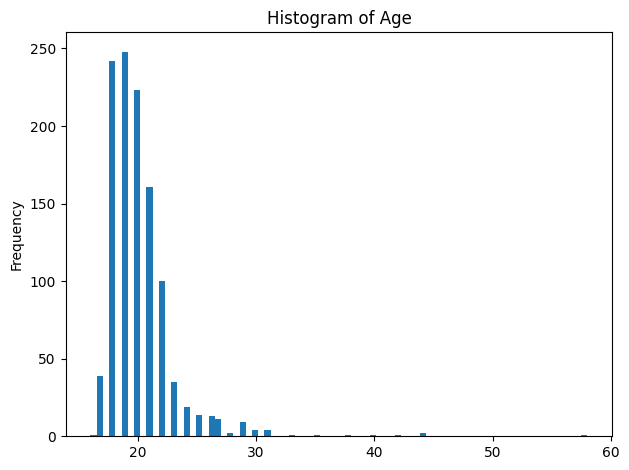

In [ ]:

df['Age'].plot(kind='hist', bins=80, title='Histogram of Age')
plt.tight_layout()
plt.show()



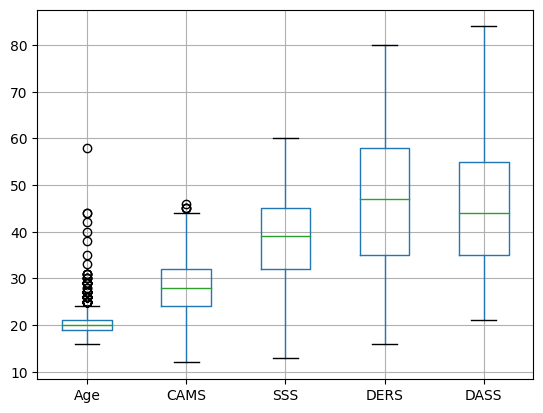

In [ ]:

df.boxplot(column=[ 'Age','CAMS', 'SSS', 'DERS', 'DASS'], grid=True)
plt.show()



### Exploratory Data Analysis

In [ ]:
#Display of dataframe for Exploratory Data Analysis
df

,Age,Ethnicity,Year_credits,Program,Disability,Living,Hobbies_Imp_1,Hobbies_Time_1,Moderate exercise,Mild exercise,Rested,Mindfulness_freq,Diagnosis,CATS,CAMS,SSS,DERS,DASS
0,18.0,2.0,1.0,7.0,2.0,2.0,2.0,1.0,4.0,3.0,2.0,1.0,2.0,5.0,18.0,37.0,63.0,50.0
1,18.0,1.0,1.0,8.0,2.0,1.0,1.0,1.0,3.0,10.0,2.0,3.0,1.0,5.0,24.0,45.0,40.0,49.0
2,18.0,2.0,1.0,2.0,2.0,2.0,3.0,2.0,5.0,1.0,2.0,1.0,1.0,5.0,24.0,32.0,72.0,68.0
3,19.0,1.0,1.0,3.0,2.0,4.0,3.0,1.0,2.0,2.0,2.0,2.0,1.0,5.0,28.0,41.0,61.0,36.0
4,18.0,1.0,1.0,3.0,1.0,4.0,2.0,1.0,3.0,2.0,3.0,1.0,1.0,4.0,35.0,32.0,43.0,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186,24.0,1.0,5.0,7.0,2.0,2.0,2.0,2.0,3.0,5.0,2.0,2.0,2.0,5.0,40.0,44.0,17.0,23.0
1188,24.0,1.0,5.0,7.0,2.0,2.0,3.0,1.0,0.0,2.0,2.0,2.0,1.0,6.0,20.0,47.0,43.0,57.0
1189,29.0,1.0,5.0,7.0,1.0,2.0,4.0,4.0,2.0,7.0,3.0,2.0,1.0,5.0,19.0,28.0,67.0,53.0
1190,25.0,1.0,5.0,2.0,1.0,4.0,2.0,1.0,2.0,5.0,1.0,1.0,2.0,4.0,41.0,45.0,16.0,29.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1133 entries, 0 to 1191
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                1133 non-null   float64
 1   Ethnicity          1133 non-null   float64
 2   Year_credits       1133 non-null   float64
 3   Program            1133 non-null   float64
 4   Disability         1133 non-null   float64
 5   Living             1133 non-null   float64
 6   Hobbies_Imp_1      1133 non-null   float64
 7   Hobbies_Time_1     1133 non-null   float64
 8   Moderate exercise  1133 non-null   float64
 9   Mild exercise      1133 non-null   float64
 10  Rested             1133 non-null   float64
 11  Mindfulness_freq   1133 non-null   float64
 12  Diagnosis          1133 non-null   float64
 13  CATS               1133 non-null   float64
 14  CAMS               1133 non-null   float64
 15  SSS                1133 non-null   float64
 16  DERS               1133 non-n

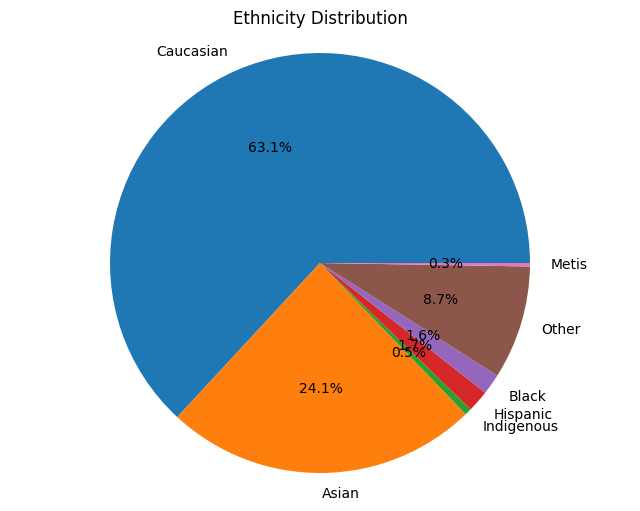

In [ ]:
#Pie chart of Ethnicity Distribution
# Define labels for the categories
labels = ['Caucasian', 'Asian', 'Indigenous', 'Hispanic', 'Black', 'Other', 'Metis']

# Count occurrences of each category
counts = df['Ethnicity'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=0)
plt.title('Ethnicity Distribution')
plt.axis('equal')
plt.show()


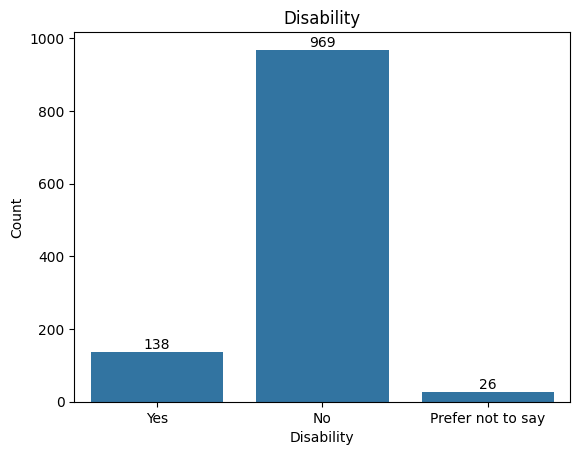

In [ ]:
# Create a bar chart of disability
sns.countplot(x='Disability', data=df)

# Add count on top of bar
for p in plt.gca().patches:
    plt.gca().text(
        p.get_x() + p.get_width() / 2.,
        p.get_height(),
        '{:1.0f}'.format(p.get_height()),
        ha='center',
        va='bottom'
    )

# Set title and labels
plt.title('Disability')
plt.xlabel('Disability')
plt.ylabel('Count')

# Set x-axis labels
plt.xticks([0, 1, 2], [ 'Yes', 'No', 'Prefer not to say'])

# Display the plot
plt.show()


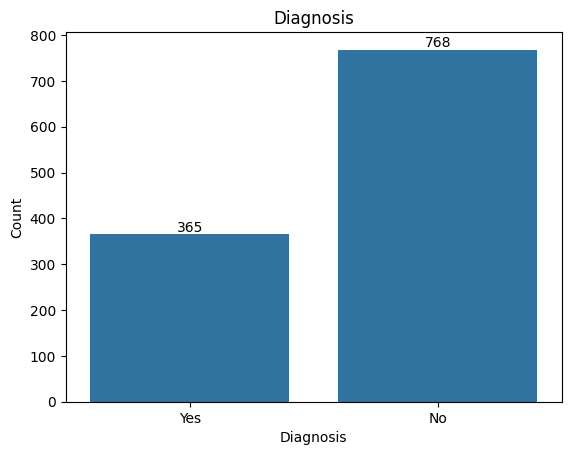

In [ ]:
# Create a count plot of diagnosis
sns.countplot(x='Diagnosis', data=df)

# Add count on top of bar
for p in plt.gca().patches:
    plt.gca().text(
        p.get_x() + p.get_width() / 2.,
        p.get_height(),
        '{:1.0f}'.format(p.get_height()),
        ha='center',
        va='bottom'
    )

# Set title and labels
plt.title('Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')

# Set x-axis labels
plt.xticks([0, 1], [ 'Yes', 'No'])

# Display the plot
plt.show()


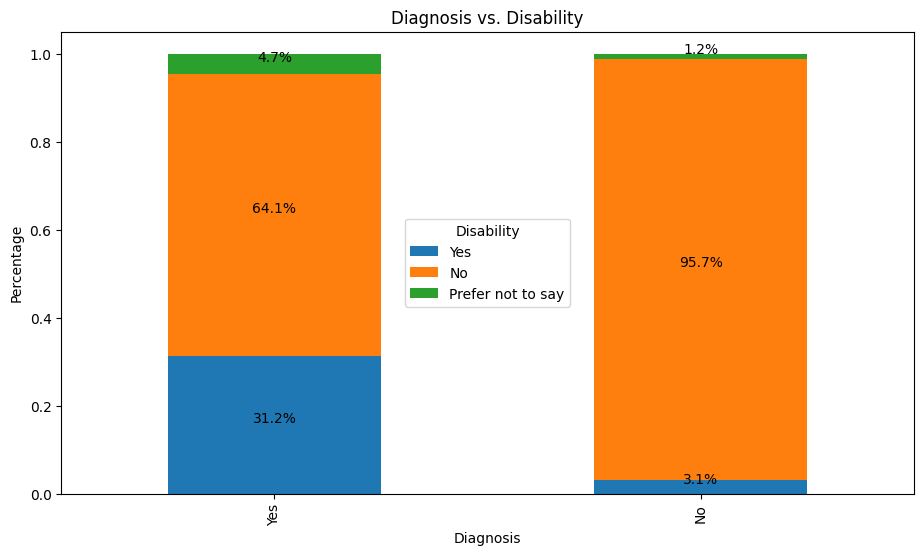

In [ ]:
# Create a crosstab table
df_crosstab = pd.crosstab(df['Diagnosis'], df['Disability'])

# Calculate percentages
df_crosstab_pct = df_crosstab.div(df_crosstab.sum(axis=1), axis=0)

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(11, 6))
df_crosstab_pct.plot(kind='bar', stacked=True, ax=ax)

# Add percentage labels
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2,
            '{:.1%}'.format(height),
            horizontalalignment='center',
            verticalalignment='bottom')

# Add labels and title
ax.set_xlabel('Diagnosis')
ax.set_ylabel('Percentage')
ax.set_title('Diagnosis vs. Disability')
plt.xticks([0, 1], [ 'Yes', 'No', ])
plt.legend(labels=['Yes', 'No', 'Prefer not to say'], loc='center',title='Disability')
# Show the plot
plt.show()


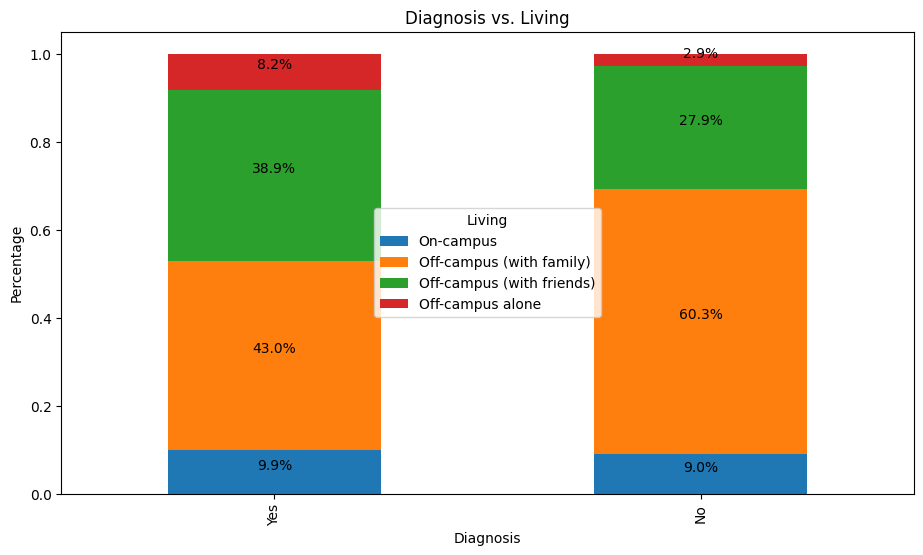

In [ ]:
# Create a crosstab table
df_crosstab = pd.crosstab(df['Diagnosis'], df['Living'])

# Calculate percentages
df_crosstab_pct = df_crosstab.div(df_crosstab.sum(axis=1), axis=0)

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(11, 6))
df_crosstab_pct.plot(kind='bar', stacked=True, ax=ax)

# Add percentage labels
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2,
            '{:.1%}'.format(height),
            horizontalalignment='center',
            verticalalignment='bottom')

# Add labels and title
ax.set_xlabel('Diagnosis')
ax.set_ylabel('Percentage')
ax.set_title('Diagnosis vs. Living')
plt.xticks([0, 1], [ 'Yes', 'No', ])
plt.legend(labels=['On-campus', 'Off-campus (with family)', 'Off-campus (with friends)', 'Off-campus alone'], loc='center',title='Living')
# Show the plot
plt.show()

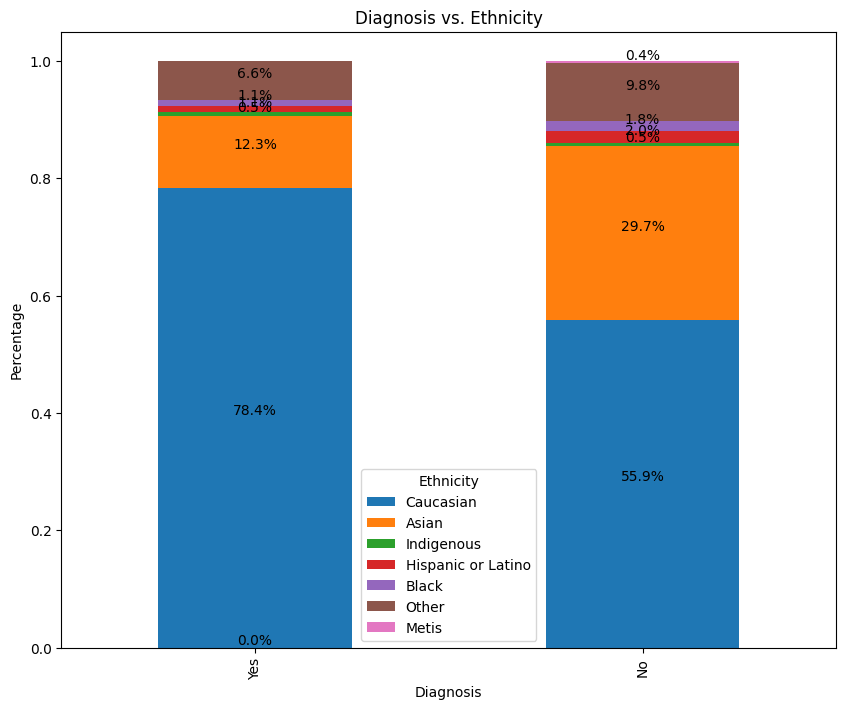

In [ ]:
# Create a crosstab table
df_crosstab = pd.crosstab(df['Diagnosis'], df['Ethnicity'])

# Calculate percentages
df_crosstab_pct = df_crosstab.div(df_crosstab.sum(axis=1), axis=0)

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 8))
df_crosstab_pct.plot(kind='bar', stacked=True, ax=ax)

# Add percentage labels
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2,
            '{:.1%}'.format(height),
            horizontalalignment='center',
            verticalalignment='bottom')

# Add labels and title
ax.set_xlabel('Diagnosis')
ax.set_ylabel('Percentage')
ax.set_title('Diagnosis vs. Ethnicity')
plt.xticks([0, 1], [ 'Yes', 'No', ])
plt.legend(labels=['Caucasian', 'Asian', 'Indigenous', 'Hispanic or Latino', 'Black', 'Other', 'Metis'], title='Ethnicity')
# Show the plot
plt.show()

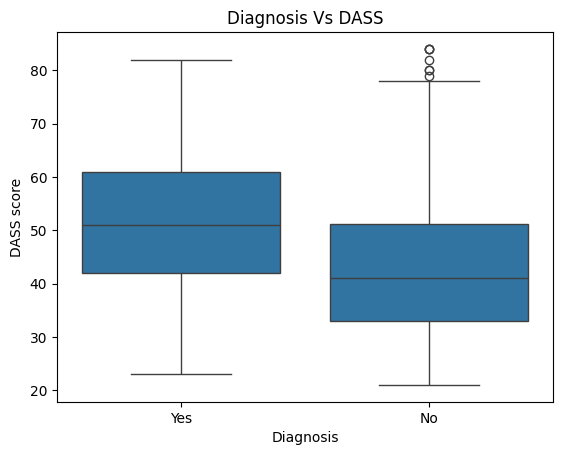

In [ ]:
#Box Plot of Diagnosis Vs DASS
sns.boxplot(x='Diagnosis', y='DASS', data=df)
plt.title('Diagnosis Vs DASS')
plt.xlabel('Diagnosis')
plt.ylabel('DASS score')
plt.xticks([0, 1], [ 'Yes', 'No'])
plt.show()


In [ ]:
import scipy.stats as stats

# Extract the data for the two groups
group1 = df[df['Diagnosis'] == 1]['DASS']
group2 = df[df['Diagnosis'] == 2]['DASS']

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(group1, group2)

# Print the results
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Check for statistical significance
alpha = 0.05
if p_value < alpha:
    print("The difference between the means is statistically significant.")
else:
    print("The difference between the means is not statistically significant.")

t-statistic: 10.257685664773625
p-value: 1.1455370767534598e-23
The difference between the means is statistically significant.


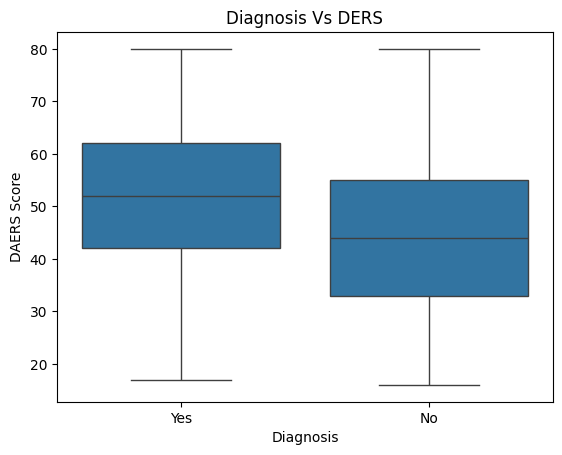

In [ ]:
#Box plot of Diagnosis Vs DERS
sns.boxplot(x='Diagnosis', y='DERS', data=df)
plt.title('Diagnosis Vs DERS')
plt.xlabel('Diagnosis')
plt.ylabel('DAERS Score')
plt.xticks([0, 1], [ 'Yes', 'No'])
plt.show()


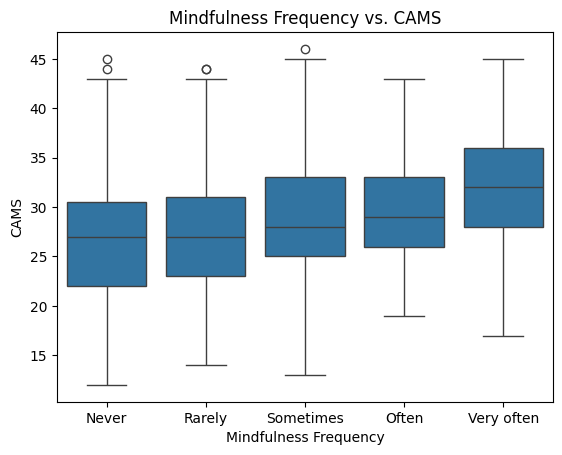

In [ ]:
#Box Plot of CAMS Versus Mindfulness_freq
sns.boxplot(x='Mindfulness_freq', y='CAMS', data=df)

# Set title and labels
plt.title('Mindfulness Frequency vs. CAMS')
plt.xlabel('Mindfulness Frequency')
plt.ylabel('CAMS')

# Set x-axis labels
plt.xticks([0,1, 2, 3, 4], ['Never', 'Rarely', 'Sometimes', 'Often', 'Very often'])

# Display the plot
plt.show()


In [ ]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd


# Perform ANOVA
f_statistic, p_value = f_oneway(*[df[df['Mindfulness_freq'] == freq]['Diagnosis'] for freq in range(1, 6)])

print("ANOVA results:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Perform Tukey test
tukey_results = pairwise_tukeyhsd(df['Diagnosis'], df['Mindfulness_freq'], alpha=0.05)

print("\nTukey test results:")
print(tukey_results)

ANOVA results:
F-statistic: 4.027242657059291
p-value: 0.003006863503013165

Tukey test results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   1.0    2.0  -0.0392 0.7711  -0.131  0.0526  False
   1.0    3.0  -0.1403 0.0024 -0.2448 -0.0359   True
   1.0    4.0  -0.1245 0.1609 -0.2754  0.0264  False
   1.0    5.0  -0.0927 0.7598 -0.3062  0.1209  False
   2.0    3.0  -0.1012 0.0631 -0.2056  0.0033  False
   2.0    4.0  -0.0853 0.5334 -0.2362  0.0656  False
   2.0    5.0  -0.0535 0.9599  -0.267  0.1601  False
   3.0    4.0   0.0158 0.9988 -0.1431  0.1747  False
   3.0    5.0   0.0477  0.976 -0.1716   0.267  False
   4.0    5.0   0.0318 0.9966  -0.213  0.2767  False
----------------------------------------------------


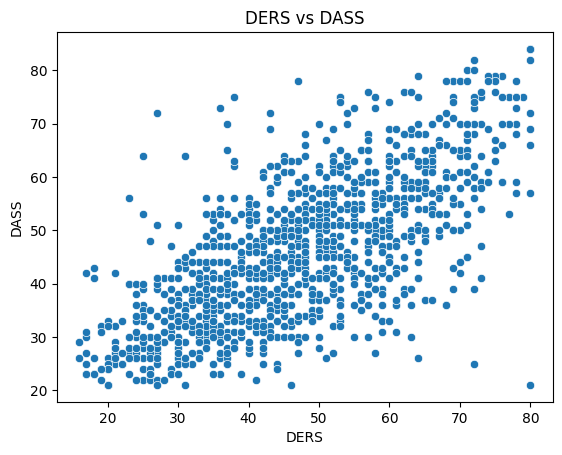

In [ ]:
# Create a scatter plot of DERS vs DASS
sns.scatterplot(x='DERS', y='DASS', data=df)

# Set title and labels
plt.title('DERS vs DASS')
plt.xlabel('DERS')
plt.ylabel('DASS')

# Display the plot
plt.show()


In [ ]:
# Group data by diagnosis
yes_group = df[df['Diagnosis'] == 1]
no_group = df[df['Diagnosis'] == 0]

# Perform independent t-test
t_statistic, p_value = stats.ttest_ind(yes_group['DASS'], no_group['DASS'])

# Set significance level
alpha = 0.05

# Compare p-value with alpha
if p_value < alpha:
    print("The difference in DASS means between Yes and No diagnosis is statistically significant.")
else:
    print("The difference in DASS means between Yes and No diagnosis is not statistically significant.")


The difference in DASS means between Yes and No diagnosis is not statistically significant.


### Machine learning Models

#### Data Preparation


In [ ]:
X_new=df[['Age', 'Ethnicity', 'Year_credits', 'Program', 'Disability', 'Living',
       'Hobbies_Imp_1', 'Hobbies_Time_1', 'Moderate exercise', 'Mild exercise',
       'Rested', 'Mindfulness_freq', 'CATS', 'CAMS', 'SSS',
       'DERS', 'DASS']]
y_new=df.Diagnosis

In [ ]:
df_new = pd.DataFrame(X_new)
df_new['Diagnosis'] = y_new


In [ ]:
df_new

,Age,Ethnicity,Year_credits,Program,Disability,Living,Hobbies_Imp_1,Hobbies_Time_1,Moderate exercise,Mild exercise,Rested,Mindfulness_freq,CATS,CAMS,SSS,DERS,DASS,Diagnosis
0,18.0,2.0,1.0,7.0,2.0,2.0,2.0,1.0,4.0,3.0,2.0,1.0,5.0,18.0,37.0,63.0,50.0,2.0
1,18.0,1.0,1.0,8.0,2.0,1.0,1.0,1.0,3.0,10.0,2.0,3.0,5.0,24.0,45.0,40.0,49.0,1.0
2,18.0,2.0,1.0,2.0,2.0,2.0,3.0,2.0,5.0,1.0,2.0,1.0,5.0,24.0,32.0,72.0,68.0,1.0
3,19.0,1.0,1.0,3.0,2.0,4.0,3.0,1.0,2.0,2.0,2.0,2.0,5.0,28.0,41.0,61.0,36.0,1.0
4,18.0,1.0,1.0,3.0,1.0,4.0,2.0,1.0,3.0,2.0,3.0,1.0,4.0,35.0,32.0,43.0,44.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186,24.0,1.0,5.0,7.0,2.0,2.0,2.0,2.0,3.0,5.0,2.0,2.0,5.0,40.0,44.0,17.0,23.0,2.0
1188,24.0,1.0,5.0,7.0,2.0,2.0,3.0,1.0,0.0,2.0,2.0,2.0,6.0,20.0,47.0,43.0,57.0,1.0
1189,29.0,1.0,5.0,7.0,1.0,2.0,4.0,4.0,2.0,7.0,3.0,2.0,5.0,19.0,28.0,67.0,53.0,1.0
1190,25.0,1.0,5.0,2.0,1.0,4.0,2.0,1.0,2.0,5.0,1.0,1.0,4.0,41.0,45.0,16.0,29.0,2.0



### KNN Classifier

In [ ]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV , cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score,recall_score,f1_score



# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

k = 5  # Number of neighbors
distance_metric = 'euclidean'


# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Instantiate the KNN classifier
classifier = KNeighborsClassifier(n_neighbors=k, metric=distance_metric)

# Train the model
classifier.fit(X_train, y_train)


# Make predictions on the testing dataset
y_pred = classifier.predict(X_test)


# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

print('\nTrue Negative(TN) = ', cm[0,0])
print('True Positive(TP) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

# Calculate the false negative rate
fnr = cm[1, 0] / (cm[1, 0] + cm[1, 1])
# Print the false negative rate
print("\nFalse negative rate:", fnr)

# Calculate and print accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

print('\n',classification_report(y_test,y_pred))


#perform hyperparameter tuning using GridSearchCV
param_grid = {'n_neighbors': [3, 5, 7, 9,11,13], 'metric': ['euclidean', 'manhattan', 'minkowski']}
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Retrain the model with the best parameters
best_classifier = grid_search.best_estimator_
best_classifier.fit(X_train, y_train)

# Make predictions with the tuned model
y_pred_tuned = best_classifier.predict(X_test)

# Compute confusion matrix and other metrics
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print("\nTuned Model Confusion Matrix:")
print(cm_tuned)


print('\nTrue Negative(TN) = ', cm_tuned[0,0])
print('True Positive(TP) = ', cm_tuned[1,1])
print('False Positives(FP) = ', cm_tuned[0,1])
print('False Negatives(FN) = ', cm_tuned[1,0])

# Calculate the false negative rate
fnr = cm_tuned[1, 0] / (cm_tuned[1, 0] + cm_tuned[1, 1])
# Print the false negative rate
print("\nFalse negative rate:", fnr)

accuracy = accuracy_score(y_test, y_pred_tuned)
precision = precision_score(y_test, y_pred_tuned)
recall = recall_score(y_test, y_pred_tuned)
f1 = f1_score(y_test, y_pred_tuned)
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

from sklearn.metrics import classification_report
print('\n',classification_report(y_test,y_pred_tuned))



Confusion Matrix:
[[ 30  39]
 [ 15 143]]

True Negative(TN) =  30
True Positive(TP) =  143
False Positives(FP) =  39
False Negatives(FN) =  15

False negative rate: 0.0949367088607595

Accuracy: 0.762114537444934
Precision: 0.6666666666666666
Recall: 0.43478260869565216
F1 Score: 0.5263157894736841

               precision    recall  f1-score   support

         1.0       0.67      0.43      0.53        69
         2.0       0.79      0.91      0.84       158

    accuracy                           0.76       227
   macro avg       0.73      0.67      0.68       227
weighted avg       0.75      0.76      0.75       227

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 11}

Tuned Model Confusion Matrix:
[[ 22  47]
 [  8 150]]

True Negative(TN) =  22
True Positive(TP) =  150
False Positives(FP) =  47
False Negatives(FN) =  8

False negative rate: 0.05063291139240506

Accuracy: 0.7577092511013216
Precision: 0.7333333333333333
Recall: 0.3188405797101449
F1 Score: 0.444444444444444

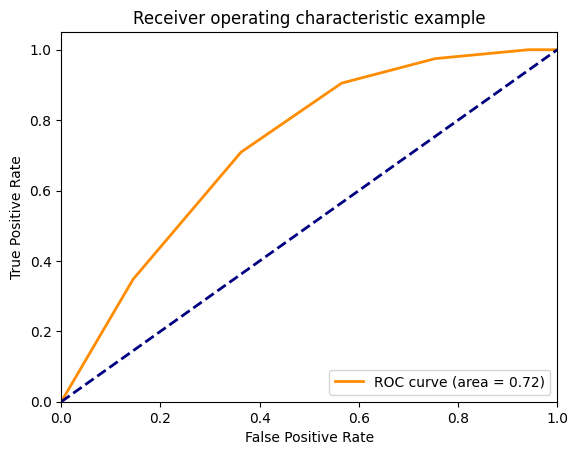

In [ ]:


from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
# Get predicted probabilities for the test set
ptest = classifier.predict_proba(X_test)[:,1]

# Calculate ROC curve and AUC
fpr_knn, tpr_knn, thresholds = roc_curve(y_test_encoded, ptest)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC curve
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()




### Decisionn Tree



####NoParameter

Confusion Matrix:
[[ 28  41]
 [ 14 144]]

True Negative(TN) =  28
True Positive(TP) =  144
False Positives(FP) =  41
False Negatives(FN) =  14

False negative rate: 0.08860759493670886

Classification Report:
              precision    recall  f1-score   support

         1.0       0.67      0.41      0.50        69
         2.0       0.78      0.91      0.84       158

    accuracy                           0.76       227
   macro avg       0.72      0.66      0.67       227
weighted avg       0.74      0.76      0.74       227


Accuracy: 0.7577092511013216
Precision: 0.6666666666666666
Recall: 0.4057971014492754
F1 Score: 0.5045045045045046


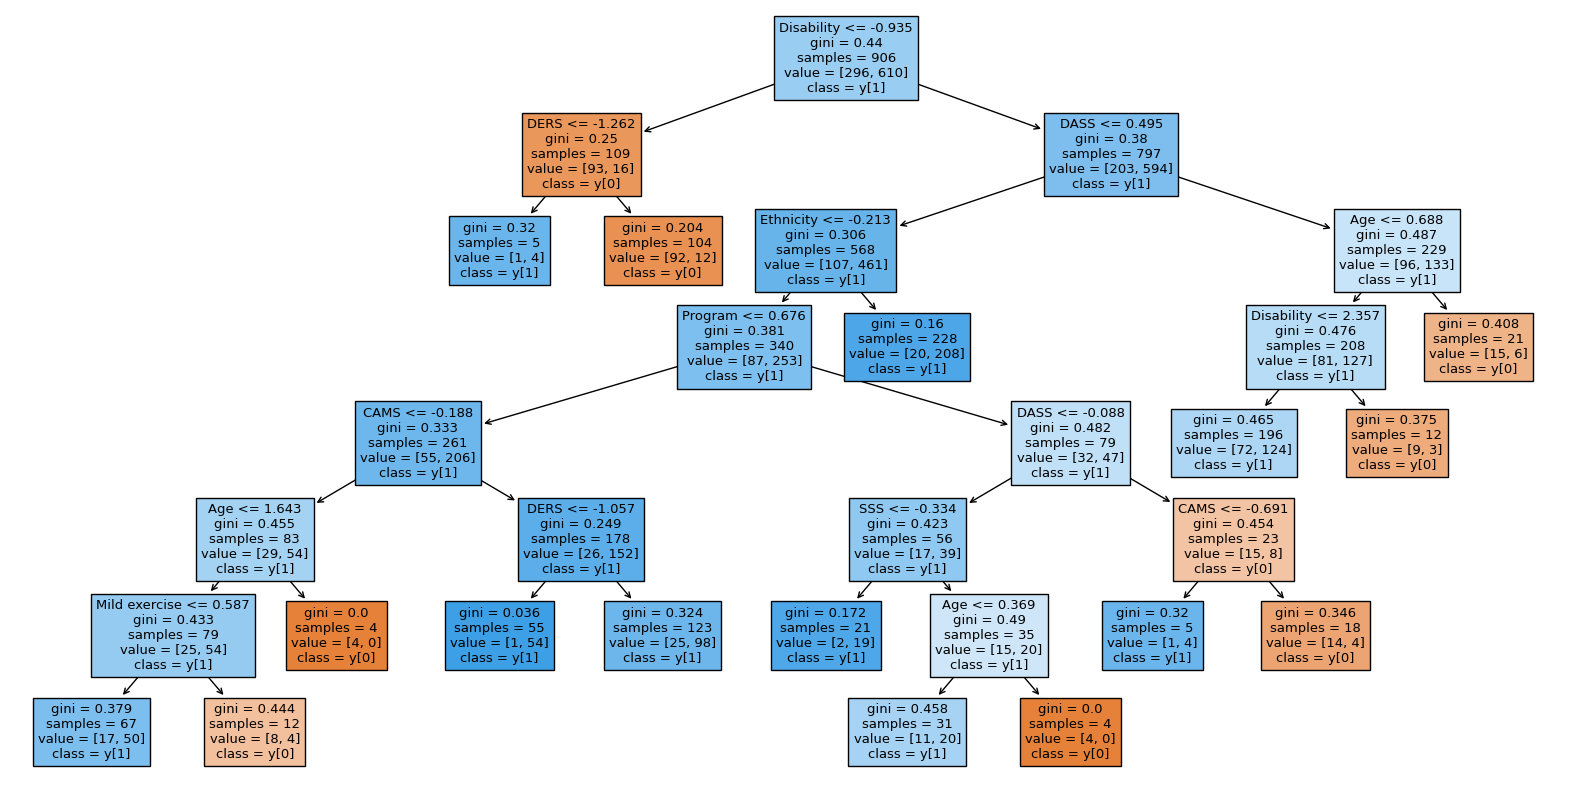

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_leaf_nodes': None, 'min_samples_leaf': 15, 'min_samples_split': 5}
Best Score: 0.5632910885142308
Cross-Validation Scores: [0.73626374 0.71270718 0.75138122 0.70165746 0.71823204]
Mean CV Score: 0.7240483273632445


In [ ]:
from sklearn.tree import DecisionTreeClassifier


# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

# Feature scaling (mandatory for some algorithms)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Instantiate the Decision Tree classifier
clf_prepruned = DecisionTreeClassifier(max_leaf_nodes=16,min_samples_split=20)
clf_prepruned.fit(X_train, y_train)

# Evaluate the model
y_pred_prepruned = clf_prepruned.predict(X_test)
cm1 = confusion_matrix(y_test, y_pred_prepruned)
classification_rep1 = classification_report(y_test, y_pred_prepruned)

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(cm1)

print('\nTrue Negative(TN) = ', cm1[0,0])
print('True Positive(TP) = ', cm1[1,1])
print('False Positives(FP) = ', cm1[0,1])
print('False Negatives(FN) = ', cm1[1,0])

# Calculate the false negative rate
fnr = cm1[1, 0] / (cm1[1, 0] + cm1[1, 1])

# Print the false negative rate
print("\nFalse negative rate:", fnr)
print("\nClassification Report:")
print(classification_rep1)

# Calculate and print accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred_prepruned)
precision = precision_score(y_test, y_pred_prepruned)
recall = recall_score(y_test, y_pred_prepruned)
f1 = f1_score(y_test, y_pred_prepruned)

print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(clf_prepruned, filled=True, feature_names=X_new.columns, class_names=True)
plt.show()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [ 3,4,5,6,7],
    'min_samples_split': [2, 5, 10, 15,20],
    'min_samples_leaf': list(range(5, 100,10)),
    'max_leaf_nodes': [None, 5, 10, 15],

}

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=clf_prepruned, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

# Perform grid search to find the best parameters
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)



# Perform label encoding for the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y_new)

# Split the dataset into training and testing sets (80% train, 20% test)
X_traincv1, X_testcv1, y_traincv1, y_testcv1 = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


# Perform cross-validation with 5 folds
cv_scores = cross_val_score(clf_prepruned, X_traincv1, y_traincv1, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))



####Tuned


Confusion Matrix:
[[ 32  37]
 [ 16 142]]

True Negative(TN) =  32
True Positive(TP) =  142
False Positives(FP) =  37
False Negatives(FN) =  16

False negative rate: 0.10126582278481013

Classification Report:
              precision    recall  f1-score   support

         1.0       0.67      0.46      0.55        69
         2.0       0.79      0.90      0.84       158

    accuracy                           0.77       227
   macro avg       0.73      0.68      0.69       227
weighted avg       0.75      0.77      0.75       227


Accuracy: 0.7665198237885462
Precision: 0.6666666666666666
Recall: 0.463768115942029
F1 Score: 0.5470085470085471


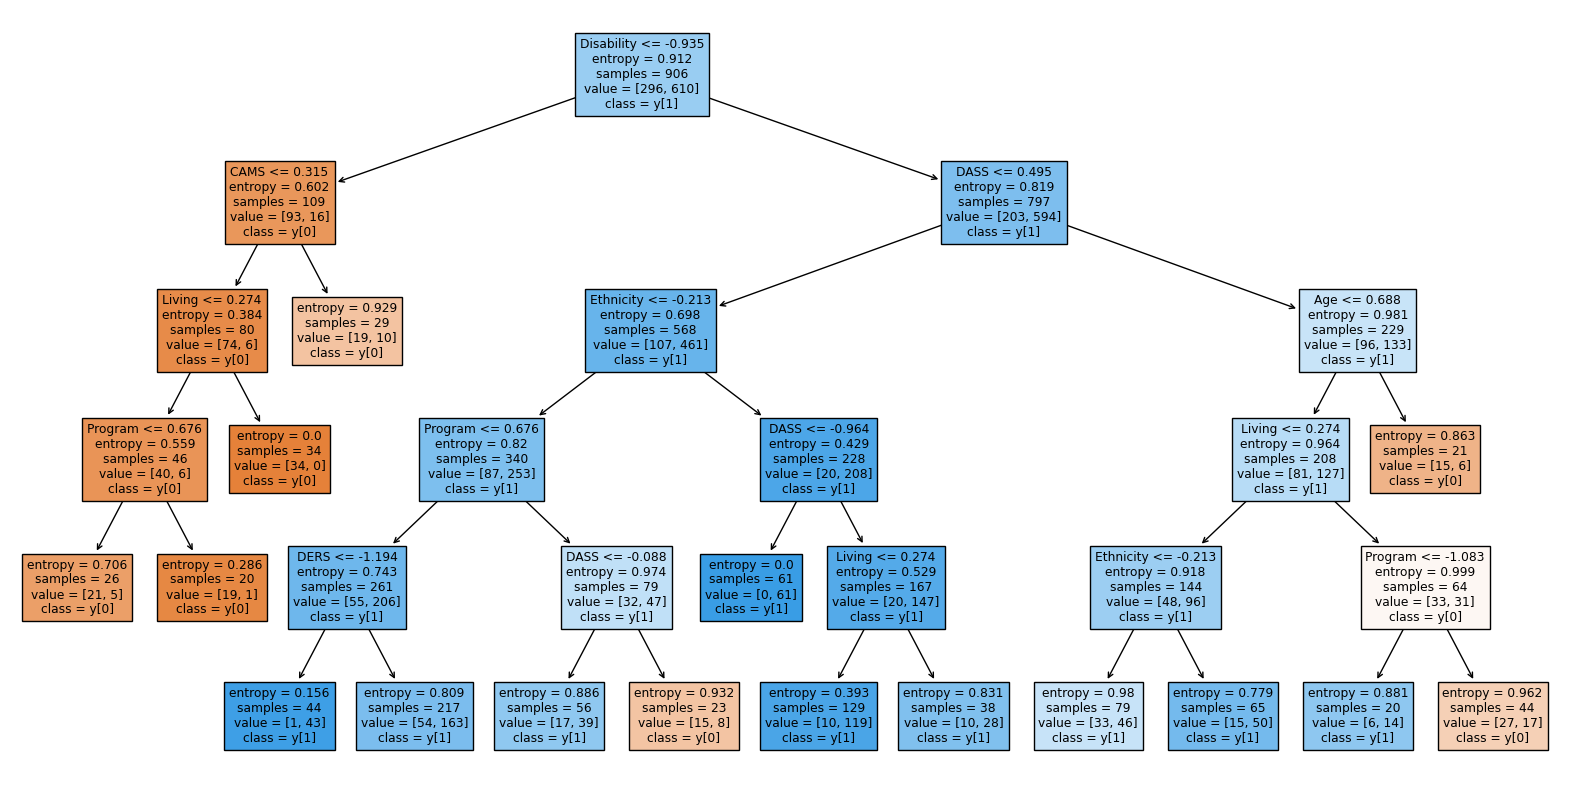

Cross-Validation Scores: [0.75274725 0.6961326  0.74033149 0.69060773 0.75690608]
Mean CV Score: 0.7273450306599477


In [ ]:
clf_tuned = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=15, min_samples_split=20 ,random_state=42)
clf_tuned.fit(X_train, y_train)
# Evaluate the model
y_pred_tuned = clf_tuned.predict(X_test)
cm = confusion_matrix(y_test, y_pred_tuned)
classification_rep = classification_report(y_test, y_pred_tuned)

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(cm)

print('\nTrue Negative(TN) = ', cm[0,0])
print('True Positive(TP) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])
# Calculate the false negative rate
fnr = cm[1, 0] / (cm[1, 0] + cm[1, 1])

# Print the false negative rate
print("\nFalse negative rate:", fnr)
print("\nClassification Report:")
print(classification_rep)

# Calculate and print accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred_tuned)
precision = precision_score(y_test, y_pred_tuned)
recall = recall_score(y_test, y_pred_tuned)
f1 = f1_score(y_test, y_pred_tuned)

print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



plt.figure(figsize=(20,10))
plot_tree(clf_tuned, filled=True, feature_names=X_new.columns, class_names=True)
plt.show()


# Split the dataset into training and testing sets (80% train, 20% test)
X_traincv2, X_testcv2, y_traincv2, y_testcv2 = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


# Perform cross-validation with 5 folds
cv_scores = cross_val_score(clf_tuned, X_traincv2, y_traincv2, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

####PostPruning


In [ ]:
# Define a range of alpha values to test
alphas = np.linspace(0.0, 0.5, 50)

# List to store cross-validation scores
cv_scores = []

# Iterate over alpha values
for alpha in alphas:
    # Create decision tree classifier with current alpha value
    clf = DecisionTreeClassifier(ccp_alpha=alpha)

    # Perform cross-validation with 5 folds
    scores = cross_val_score(clf, X_train, y_train, cv=5)

    # Compute the mean cross-validation score
    mean_score = np.mean(scores)

    # Append mean score to the list of cross-validation scores
    cv_scores.append(mean_score)

# Find the optimal alpha value that maximizes cross-validation score
optimal_alpha = alphas[np.argmax(cv_scores)]
print("Optimal alpha:", optimal_alpha)

# Train the decision tree classifier with the optimal alpha
clf = DecisionTreeClassifier(ccp_alpha=optimal_alpha)
clf.fit(X_train, y_train)

# Evaluate the model on the test set
test_accuracy = clf.score(X_test, y_test)
print("Test accuracy:", test_accuracy)


Optimal alpha: 0.01020408163265306
Test accuracy: 0.7533039647577092


####FinalModel

Confusion Matrix:
[[ 21  48]
 [  8 150]]

True Negative(TN) =  21
True Positive(TP) =  150
False Positives(FP) =  48
False Negatives(FN) =  8

False negative rate: 0.05063291139240506

Classification Report:
              precision    recall  f1-score   support

         1.0       0.72      0.30      0.43        69
         2.0       0.76      0.95      0.84       158

    accuracy                           0.75       227
   macro avg       0.74      0.63      0.64       227
weighted avg       0.75      0.75      0.72       227


Accuracy: 0.7533039647577092
Precision: 0.7241379310344828
Recall: 0.30434782608695654
F1 Score: 0.42857142857142866


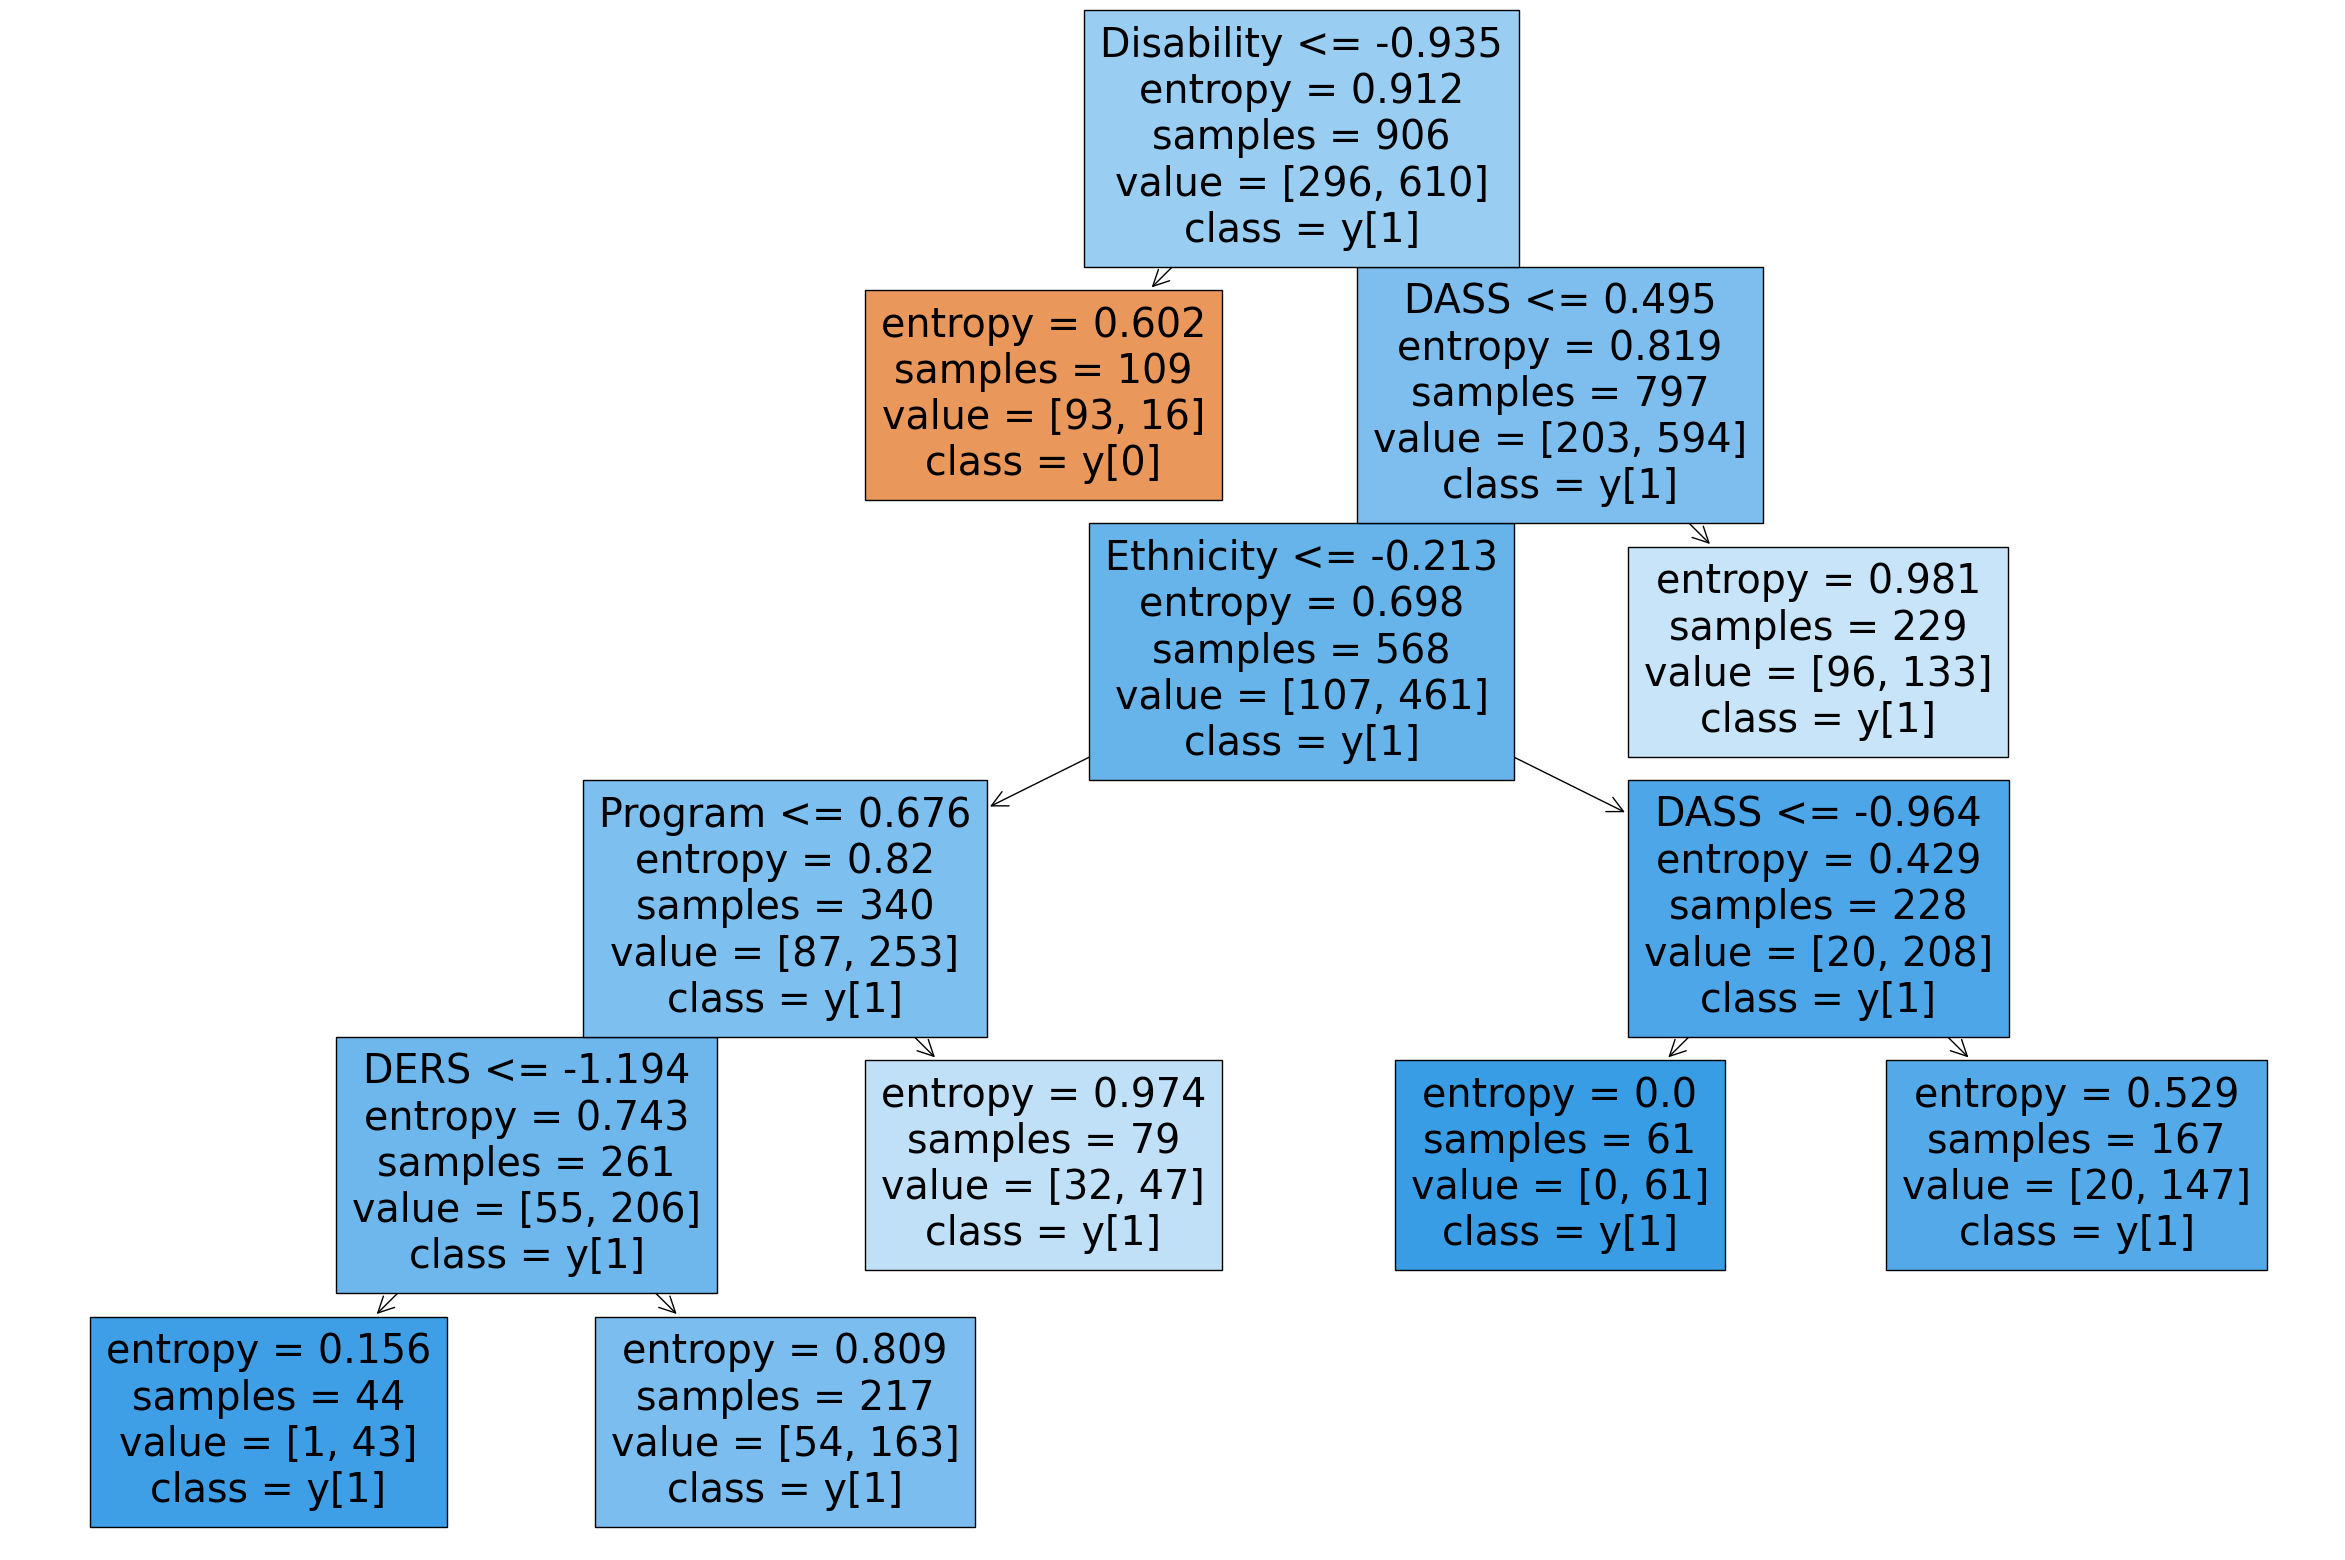

In [ ]:
clf_tuned_pp = DecisionTreeClassifier(ccp_alpha=0.0102,criterion='entropy', max_depth=5, min_samples_leaf=15, min_samples_split=15, random_state=42)
clf_tuned_pp.fit(X_train, y_train)
# Evaluate the model
y_pred_tuned_pp = clf_tuned_pp.predict(X_test)
cm = confusion_matrix(y_test, y_pred_tuned_pp)
classification_rep = classification_report(y_test, y_pred_tuned_pp)

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(cm)

print('\nTrue Negative(TN) = ', cm[0,0])
print('True Positive(TP) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])
# Calculate the false negative rate
fnr = cm[1, 0] / (cm[1, 0] + cm[1, 1])

# Print the false negative rate
print("\nFalse negative rate:", fnr)
print("\nClassification Report:")
print(classification_rep)

# Calculate and print accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred_tuned_pp)
precision = precision_score(y_test, y_pred_tuned_pp)
recall = recall_score(y_test, y_pred_tuned_pp)
f1 = f1_score(y_test, y_pred_tuned_pp)

print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)




plt.figure(figsize=(30,20))
plot_tree(clf_tuned_pp, filled=True, feature_names=X_new.columns, class_names=True)
plt.show()

####ROC-AUC


Cross-Validation Scores: [0.75824176 0.74033149 0.72928177 0.7679558  0.75138122]
Mean CV Score: 0.7494384068969704


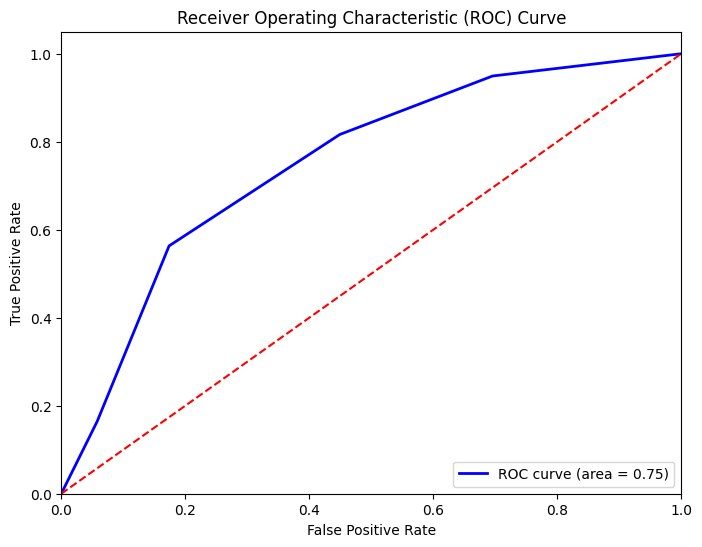

In [ ]:
# Perform label encoding for the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y_new)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


# Perform cross-validation with 5 folds
cv_scores = cross_val_score(clf_tuned_pp, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# Fit the model on the training data
clf_tuned_pp.fit(X_train, y_train)

# Generate predictions on the test data
y_pred_proba = clf_tuned_pp.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


###RandomForest

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best Score: 0.8447271309406942
Confusion Matrix:
[[ 26  43]
 [  8 150]]

True Negative(TN) =  26
True Positive(TP) =  150
False Positives(FP) =  43
False Negatives(FN) =  8

Accuracy: 0.775330396475771
Precision: 0.7772020725388601
Recall: 0.9493670886075949
F1 Score: 0.8547008547008547


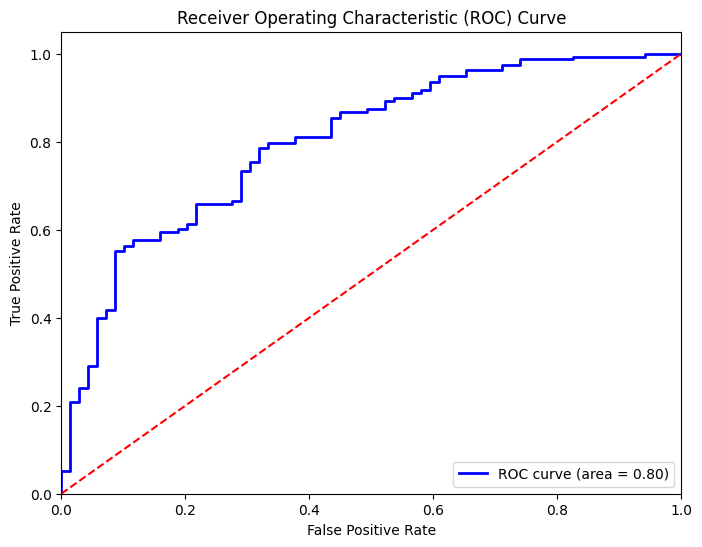

In [ ]:
from sklearn.ensemble import RandomForestClassifier
le = LabelEncoder()
y_encoded = le.fit_transform(y_new)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_new, y_encoded, test_size=0.2, random_state=42)

# Feature scaling (mandatory for some algorithms)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Instantiate the Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

# Perform grid search to find the best parameters
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Instantiate the Random Forest classifier with the best parameters
clf_tuned = RandomForestClassifier(**best_params, random_state=42)

# Fit the model on the training data
clf_tuned.fit(X_train, y_train)

# Evaluate the model
y_pred = clf_tuned.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(cm)

print('\nTrue Negative(TN) = ', cm[0,0])
print('True Positive(TP) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

# Calculate and print accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
# Perform label encoding for the target variable

# Plot ROC curve
y_pred_proba = clf_tuned.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


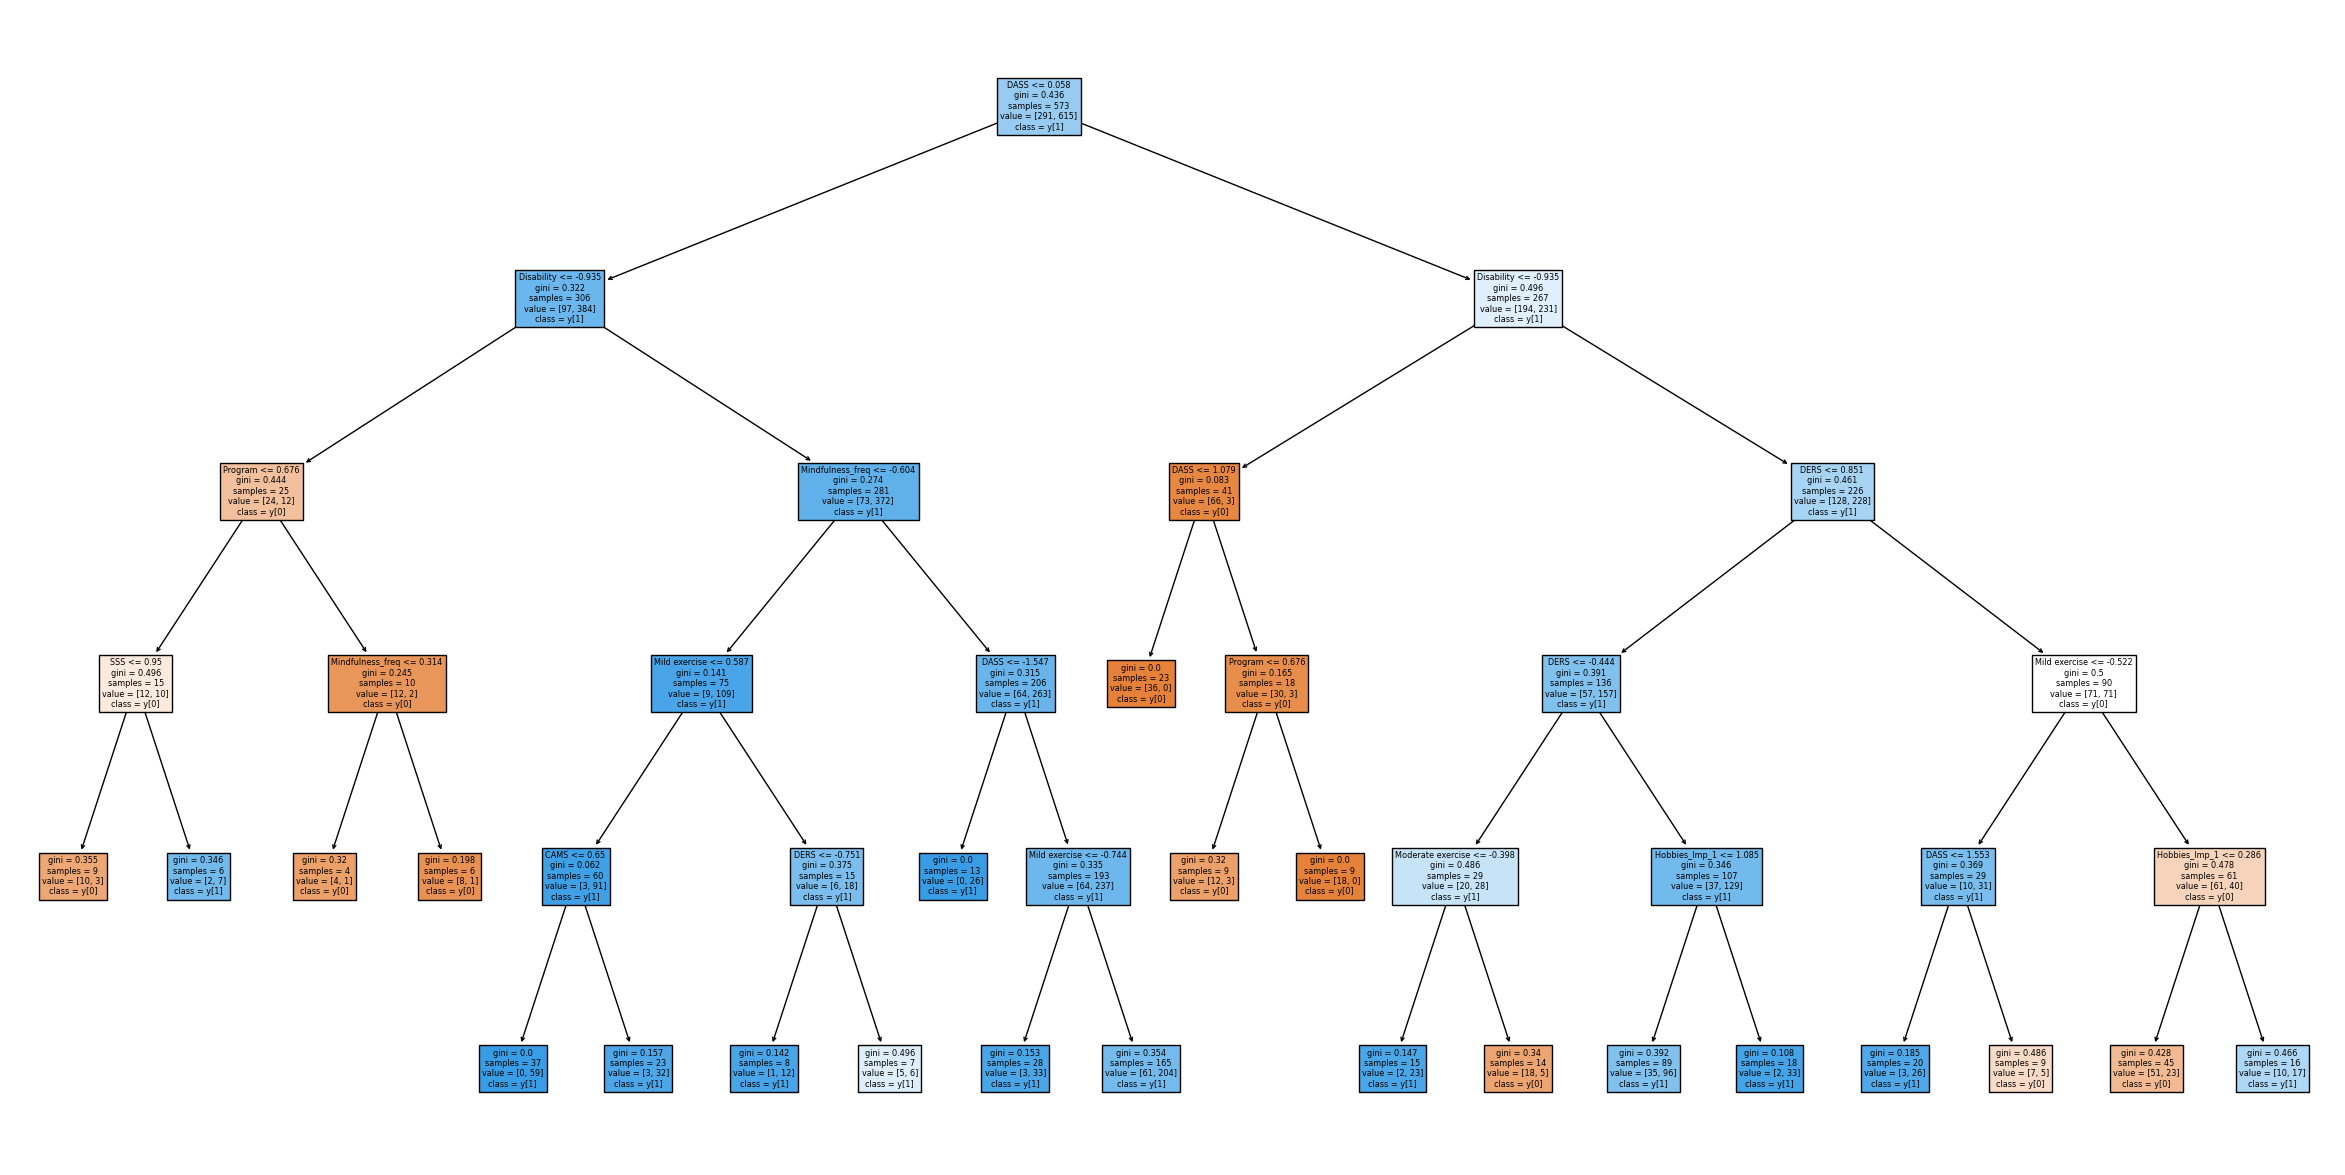

In [ ]:

from sklearn.tree import plot_tree

# Get the first tree in the forest
tree = clf_tuned.estimators_[0]

# Plot the tree
plt.figure(figsize=(30, 15))
plot_tree(tree, filled=True, feature_names=X_new.columns, class_names=True)
plt.show()


###Covid Anallysis

In [ ]:
coviddf

,Pre_GAD_1,Pre_GAD_2,Pre_PHQ_1,Pre_PHQ_2,Pre_PSS_1,Pre_PSS_2,Pre_PSS_3,Pre_PSS_4,Pre_PSS_5,Pre_PSS_6,...,Post_PSS_1,Post_PSS_2,Post_PSS_3,Post_PSS_4,Post_PSS_5,Post_PSS_6,Post_PSS_7,Post_PSS_8,Post_PSS_9,Post_PSS_10
0,2.0,2.0,2.0,2.0,3.0,4.0,4.0,2.0,3.0,3.0,...,4.0,3.0,3.0,1.0,3.0,3.0,2.0,3.0,3.0,3.0
1,4.0,3.0,1.0,1.0,3.0,2.0,5.0,3.0,3.0,4.0,...,5.0,4.0,3.0,4.0,2.0,2.0,3.0,4.0,3.0,2.0
2,2.0,2.0,1.0,2.0,3.0,3.0,4.0,4.0,2.0,3.0,...,2.0,3.0,4.0,3.0,4.0,4.0,2.0,3.0,4.0,4.0
3,3.0,3.0,2.0,1.0,3.0,3.0,5.0,3.0,3.0,3.0,...,4.0,4.0,5.0,4.0,2.0,4.0,3.0,3.0,4.0,3.0
4,4.0,4.0,1.0,1.0,2.0,1.0,5.0,4.0,4.0,2.0,...,2.0,1.0,5.0,4.0,3.0,3.0,4.0,3.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,2.0,2.0,3.0,3.0,3.0,4.0,4.0,3.0,2.0,5.0,...,3.0,5.0,4.0,2.0,2.0,5.0,3.0,1.0,3.0,5.0
1188,2.0,2.0,2.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,...,4.0,4.0,5.0,4.0,3.0,4.0,3.0,2.0,3.0,4.0
1189,1.0,1.0,1.0,2.0,3.0,3.0,3.0,3.0,4.0,3.0,...,4.0,3.0,4.0,3.0,1.0,5.0,1.0,2.0,5.0,4.0
1190,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,4.0,3.0,...,2.0,2.0,2.0,5.0,4.0,3.0,4.0,4.0,2.0,3.0


In [ ]:

# Calculate Sum of PreGAD
coviddf['PreGAD'] = round(coviddf[['Pre_GAD_1','Pre_GAD_2']].sum(axis=1))

# Delete PreGAD Columns
coviddf.drop(columns=['Pre_GAD_1','Pre_GAD_2'], inplace=True)

#Calculate Sum of PrePHQ
coviddf.loc[:, 'PrePHQ'] = round(coviddf[['Pre_PHQ_1', 'Pre_PHQ_2']].sum(axis=1))

# Drop the columns 'Pre_PHQ_1' and 'Pre_PHQ_2' from coviddf
coviddf.drop(columns=['Pre_PHQ_1', 'Pre_PHQ_2'], inplace=True)

In [ ]:
#REVERSE SCORING AS PER SCALE INSTRUCTIONS
coviddf['Pre_PSS_4'] = 5-coviddf['Pre_PSS_4'].astype('int')
coviddf['Pre_PSS_5'] = 5-coviddf['Pre_PSS_5'].astype('int')
coviddf['Pre_PSS_7'] = 5-coviddf['Pre_PSS_7'].astype('int')
coviddf['Pre_PSS_8'] = 5-coviddf['Pre_PSS_8'].astype('int')


coviddf['Post_PSS_4'] = 5-coviddf['Post_PSS_4'].astype('int')
coviddf['Post_PSS_5'] = 5-coviddf['Post_PSS_5'].astype('int')
coviddf['Post_PSS_7'] = 5-coviddf['Post_PSS_7'].astype('int')
coviddf['Post_PSS_8'] = 5-coviddf['Post_PSS_8'].astype('int')

In [ ]:
# Sum columns Pre_PSS_1 to Pre_PSS_10 and drop the columns

coviddf['Pre_PSS'] = coviddf[['Pre_PSS_1', 'Pre_PSS_2', 'Pre_PSS_3', 'Pre_PSS_4', 'Pre_PSS_5', 'Pre_PSS_6', 'Pre_PSS_7', 'Pre_PSS_8', 'Pre_PSS_9', 'Pre_PSS_10']].sum(axis=1)
coviddf.drop(columns=['Pre_PSS_1', 'Pre_PSS_2', 'Pre_PSS_3', 'Pre_PSS_4', 'Pre_PSS_5', 'Pre_PSS_6', 'Pre_PSS_7', 'Pre_PSS_8', 'Pre_PSS_9', 'Pre_PSS_10'], inplace=True)

In [ ]:
# Sum columns Post_PSS_1 to Post_PSS_10 and drop the columns

coviddf['Post_PSS'] = coviddf[['Post_PSS_1', 'Post_PSS_2', 'Post_PSS_3', 'Post_PSS_4', 'Post_PSS_5', 'Post_PSS_6', 'Post_PSS_7', 'Post_PSS_8', 'Post_PSS_9', 'Post_PSS_10']].sum(axis=1)
coviddf.drop(columns=['Post_PSS_1', 'Post_PSS_2', 'Post_PSS_3', 'Post_PSS_4', 'Post_PSS_5', 'Post_PSS_6', 'Post_PSS_7', 'Post_PSS_8', 'Post_PSS_9', 'Post_PSS_10'], inplace=True)

In [ ]:
# Calculate the sum of PostGAD scores
coviddf['PostGAD'] = round(coviddf[['Post_GAD_1','Post_GAD_2']].sum(axis=1))

# Delete the columns PostGAD
coviddf.drop(columns=['Post_GAD_1','Post_GAD_2'], inplace=True)

In [ ]:
# Calculate the Sum of Post_PHQ
coviddf['PostPHQ'] = round(coviddf[['Post_PHQ_1','Post_PHQ_2']].sum(axis=1))

# Delete the columns Post_pHQ
coviddf.drop(columns=['Post_PHQ_1','Post_PHQ_2'], inplace=True)

In [ ]:
coviddf

,PreGAD,PrePHQ,Pre_PSS,Post_PSS,PostGAD,PostPHQ
0,4.0,4.0,30.0,30.0,5.0,4.0
1,7.0,2.0,26.0,26.0,7.0,5.0
2,4.0,3.0,26.0,29.0,8.0,6.0
3,6.0,3.0,28.0,32.0,7.0,5.0
4,8.0,2.0,24.0,25.0,8.0,2.0
...,...,...,...,...,...,...
1187,4.0,6.0,32.0,37.0,6.0,7.0
1188,4.0,4.0,25.0,32.0,6.0,6.0
1189,2.0,3.0,28.0,38.0,7.0,6.0
1190,2.0,2.0,19.0,17.0,2.0,2.0


####PerceivedStressScale

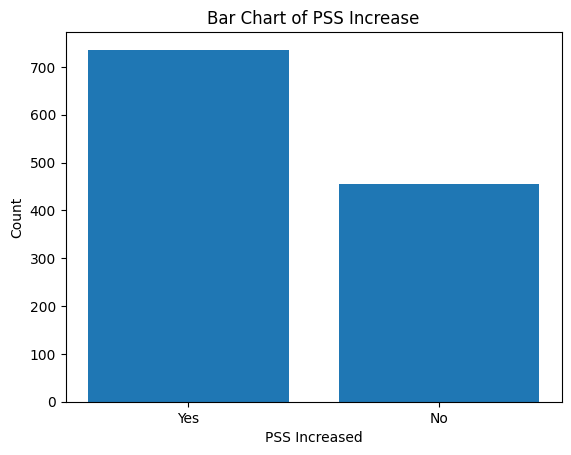

In [ ]:
diff = []
for i in range(len(coviddf)):
  difference = coviddf.loc[i, 'Post_PSS'] - coviddf.loc[i, 'Pre_PSS']
  if difference > 0:
    diff.append('Yes')
  else:
    diff.append('No')

coviddf['PSS_Increased'] = diff
# Count the occurrences of "Yes" and "No" in the "PSS_Increased" column
yes_count = coviddf[coviddf['PSS_Increased'] == 'Yes'].shape[0]
no_count = coviddf[coviddf['PSS_Increased'] == 'No'].shape[0]

# Define labels and values for the bar chart
labels = ['Yes', 'No']
values = [yes_count, no_count]

# Create a bar chart
plt.bar(labels, values)

# Add title and axis labels
plt.title('Bar Chart of PSS Increase')
plt.xlabel('PSS Increased')
plt.ylabel('Count')

# Show the bar chart
plt.show()


In [ ]:
from scipy.stats import ttest_ind
mean_pss_pre = coviddf['Pre_PSS'].mean()
mean_pss_post = coviddf['Post_PSS'].mean()

# Statistical Analysis (t-test)
t_stat, p_value = ttest_ind(coviddf['Pre_PSS'], coviddf['Post_PSS'])

print("Mean PSS Score Pre-COVID:", mean_pss_pre)
print("Mean PSS Score Post-COVID:", mean_pss_post)
print("p-value:", p_value)


Mean PSS Score Pre-COVID: 26.5251677852349
Mean PSS Score Post-COVID: 29.39681208053691
p-value: 4.8269464214276046e-24


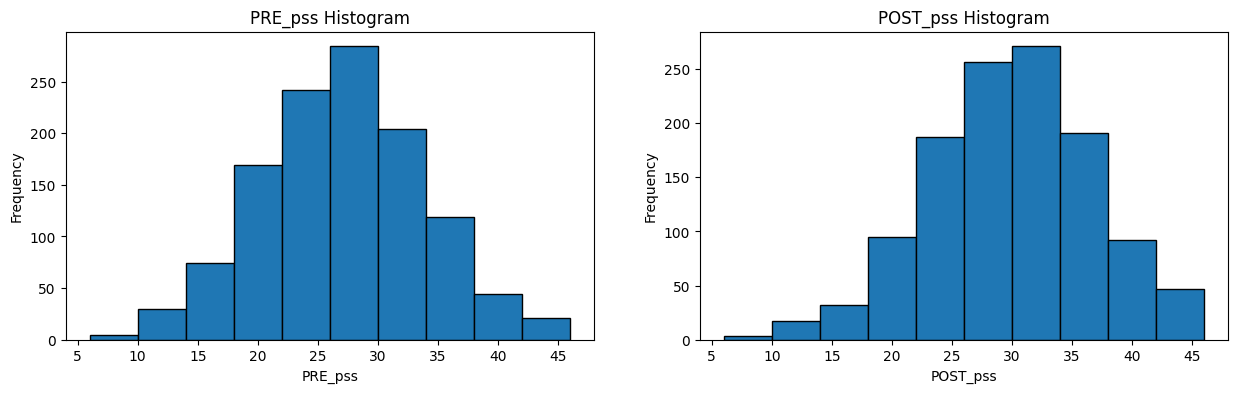

In [ ]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))

# Plot the histogram of PRE_pss in the first subplot
ax1.hist(coviddf['Pre_PSS'], bins=10, edgecolor='black')
ax1.set_title('PRE_pss Histogram')
ax1.set_xlabel('PRE_pss')
ax1.set_ylabel('Frequency')

# Plot the histogram of POST_pss in the second subplot
ax2.hist(coviddf['Post_PSS'], bins=10, edgecolor='black')
ax2.set_title('POST_pss Histogram')
ax2.set_xlabel('POST_pss')
ax2.set_ylabel('Frequency')

# Show the plot
plt.show()


###Results

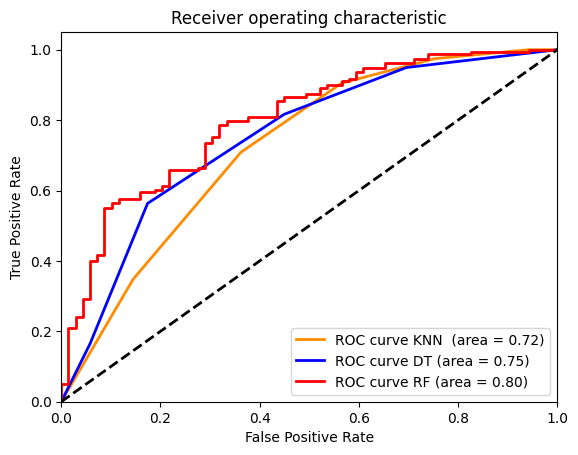

In [ ]:
# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr_knn, tpr_knn, color='darkorange',lw=2, label='ROC curve KNN  (area = %0.2f)' % roc_auc_knn)
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label='ROC curve DT (area = %0.2f)' % roc_auc_dt)
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label='ROC curve RF (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
